In [1]:

from sklearn import datasets # to create makemoon dataset 
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
X,y = datasets.make_moons(n_samples=1000,
                        noise=0.2,
                        random_state=42)

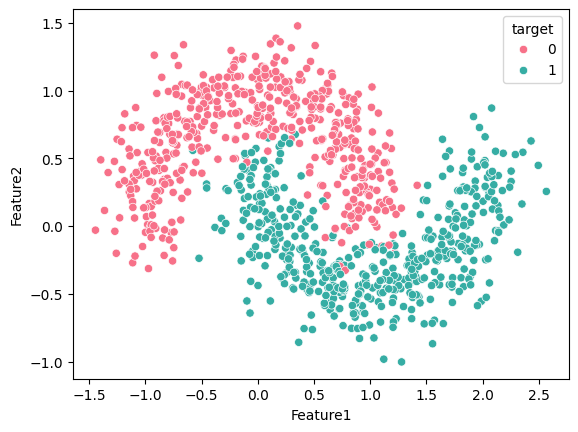

In [3]:
data_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data_df['target'] = y

# Visualize the data distribution
sns.scatterplot(x='Feature1', y='Feature2', hue='target', data=data_df, palette='husl')
plt.show()


In [4]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [5]:
data_train

array([[-0.11166654,  0.52022374,  1.        ],
       [ 1.14264982, -0.34257734,  1.        ],
       [ 0.79555796, -0.01144231,  1.        ],
       ...,
       [-0.74920273,  0.62390508,  0.        ],
       [-0.94792693,  0.14553198,  0.        ],
       [ 1.79932725,  0.26075515,  1.        ]])

<center><img src="../images/perceptron-math.png" alt="linear_regression" width="500"/></center>

In [6]:
def predict(row,weights):
    z = weights[0] # initial weight will be a bias (b)

    for i in range(len(row) - 1):  # -1 because last one is Y 

       #z = w * x + b  
        z += weights[i+1]*row[i]   # input : [[-0.11166654,  0.52022374,  1.        ]] so select each column value from this particular row 
                                    #inputs: [[x1 , x2 , y1]]
                                    #weight:  [w1 , w2]

    return 1 if z >= 0 else 0 

In [7]:
data_train.shape

(900, 3)

In [8]:
def train_weights(inputs,epochs,alpha):

    errors = {}

    weights = np.random.rand(data_train.shape[1])

    m = len(inputs)

    for epoch in range(epochs):
        sum_error = 0
        for row in inputs:
            
            # make prediction and calculate error 
            prediction = predict(row,weights)
            dz = prediction - row[-1]
            sum_error += dz**2

            #update weights based on error
             
            weights[0] -=  alpha * dz  # update bias 

            for i in range(len(row)-1):
                weights[i+1] -= alpha * dz * row[i] # update weights 

        errors[epoch] = sum_error/m

    return errors , weights


In [9]:
errors, weights = train_weights(data_train, 10,0.1)

In [10]:
errors

{0: np.float64(0.2),
 1: np.float64(0.18),
 2: np.float64(0.18),
 3: np.float64(0.18666666666666668),
 4: np.float64(0.18),
 5: np.float64(0.17333333333333334),
 6: np.float64(0.17333333333333334),
 7: np.float64(0.17333333333333334),
 8: np.float64(0.1711111111111111),
 9: np.float64(0.16666666666666666)}